In [1]:
import numpy as np
from PIL import Image
from math import radians
import matplotlib.pyplot as plt

from bookdeform import BookDeform
from render import Render

# Define the Book

In [2]:
# Define image and curve feature
folder = "./data_test/"

# load image
# openGL need the color to be referenced as uint8
img = np.array(Image.open(folder + "plant.jpg").convert("RGB"))

# deform parameters
alpha = 0.2      # beginning slope
beta = 0.2  # ending slope

# init deform
book = BookDeform(img.shape[1], img.shape[0], alpha, beta)
# get deformed surface meshgrid, normalized
xx_d, yy_d, zz_d = book.get_surface()

# transform image to be put on the surface
# no need to redo deformation computation if the image is the same size
img_proj = book.project_image_on_surface(img)

(<Axes: title={'center': 'deformation field'}>,
 Text(0.5, 1.0, 'deformation field'),
 <matplotlib.colorbar.Colorbar at 0x2a2e087acf0>)

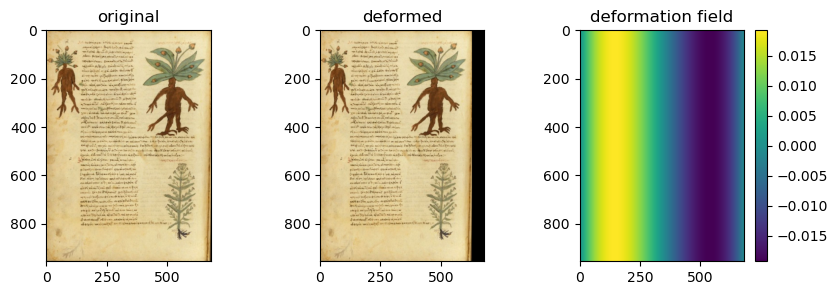

In [3]:
plt.figure(figsize=(10, 3)),
plt.subplot(1, 3, 1), plt.imshow(img), plt.title("original")
plt.subplot(1, 3, 2), plt.imshow(img_proj), plt.title("deformed")
plt.subplot(1, 3, 3), plt.imshow(zz_d), plt.title("deformation field"), plt.colorbar()

# Define the view and render it

In [4]:
# Define the render properties
# Apply rotation: (yaw, pitch, roll) in radians
rotation = (
    radians(0),  # yaw
    radians(0),  # pitch
    radians(0)   # roll
)

type_proj="perspective" # "orthographic"
fov = np.radians(90.0)

# cerate a view
view = Render(rotation=rotation, fovy=fov, type_proj=type_proj)

# render a 3D surface with a mapped image ontop, on this view
rotated_image = view.render_textured_surface(xx_d, yy_d, zz_d, img_proj)

# save the result
Image.fromarray(rotated_image).save(folder + "render.jpg")

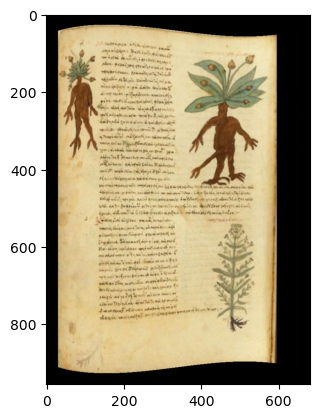

In [5]:
plt.figure(),
plt.imshow(np.array(Image.open(folder + "render.jpg").convert("RGB")))